## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [45]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # TODO: Generate the dataset with
    
    X = np.linspace(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3
    noise = np.random.normal(0, noise_std, size=num_samples)
    y += noise

    return X, y

In [46]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [47]:
from sklearn.model_selection import train_test_split

degree = 5
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.5)
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [49]:
def train_polynomial_regression(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly_features, LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    return model

In [50]:
models = {}
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, degree=d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [53]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


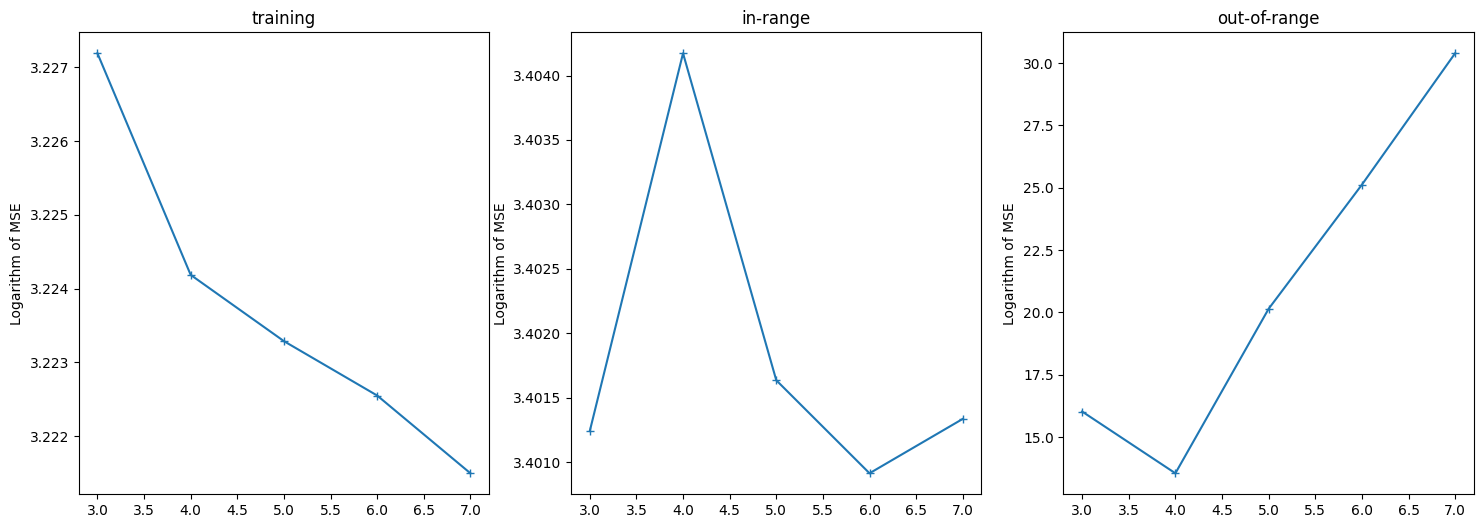

In [54]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7
def get_losses(X_train, y_train, X_test_in_range, y_test_in_range, X_test_out_of_range, y_test_out_of_range):
    models = {}
    for d in range(3, 8):
        models[d] = train_polynomial_regression(X_train, y_train, degree=d)

    losses_train = evaluate_models(models, X_train, y_train)
    losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
    losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

    return losses_train, losses_in_range, losses_out_of_range

losses_train, losses_in_range, losses_out_of_range = get_losses(X_train, y_train, X_test_in_range, y_test_in_range, X_test_out_of_range, y_test_out_of_range)

degrees = list(losses_train.keys())
train_losses = [losses_train[d] for d in degrees]
in_range_losses = [losses_in_range[d] for d in degrees]
out_of_range_losses = [losses_out_of_range[d] for d in degrees]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
plt.subplot(1, 3, 1)
plt.plot(degrees, np.log(train_losses), marker='+')
plt.title('training')
plt.ylabel('Logarithm of MSE')


# TODO: Plot logarithm of losses of in-range test set
plt.subplot(1, 3, 2)
plt.plot(degrees, np.log(in_range_losses), marker='+')
plt.title('in-range')
plt.ylabel('Logarithm of MSE')

# TODO: Plot logarithm of losses of out-of-range test set
plt.subplot(1, 3, 3)
plt.plot(degrees, np.log(out_of_range_losses), marker='+')
plt.title('out-of-range')
plt.ylabel('Logarithm of MSE')

plt.show()

## Conclusion (10 Points)

Now print out the losses on each set here. 

In [55]:
print("Training Set:")
for degree, loss in losses_train.items():
    print(f"Degree {degree}: {loss}")

Training Set:
Degree 3: 25.208693581170603
Degree 4: 25.13310872752075
Degree 5: 25.110550669498735
Degree 6: 25.092054918683342
Degree 7: 25.06563293453851


In [56]:
print("\nIn-Range:")
for degree, loss in losses_in_range.items():
    print(f"Degree {degree}: {loss}")


In-Range:
Degree 3: 30.001289112439437
Degree 4: 30.08938777938335
Degree 5: 30.013118624076487
Degree 6: 29.99145749612853
Degree 7: 30.00412101441046


In [57]:
print("\nOut-of-Range")
for degree, loss in losses_out_of_range.items():
    print(f"Degree {degree}: {loss}")


Out-of-Range
Degree 3: 9097480.254560474
Degree 4: 764184.114977682
Degree 5: 560644480.7277433
Degree 6: 81428904096.62088
Degree 7: 15881994433947.49


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

۱)training set and the in-range test set:

چندجمله ایی با درجات بالا باعث میشه اورفیتینگ زیاد بشه و اگر مقدار لاس در ترینینگ ست کمتر از اینرینج تست ست باشه(مخصوصا در درجات بالا)
باعث میشه مدل مقدار نویز رو یاد بگیره و اور فیتینگ رخ بده

۲)in-range test set and the out-of-range test set

اگر مقدار لاس در اینرینج تست ست کمتر از مقدار لاس در اوتاف رینج تست ست باشد یعنی مدل اورفیت نمیشود
و اکر تفاوتی بین مقدار لاس این دو گروه نباشد یعنی مدل آندرفیت شده

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.